<b>¡Hola Jairo!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

______________

## Descripción del proyecto: Análisis de la pagina web: Showz

El departamento de analítica de Showz, una empresa de venta de entradas de eventos, requiere optimizar los gastos de marketing. Para realizar el análisis contamos con: 

	• registros del servidor con datos sobre las visitas a Showz 
	• un archivo con los pedidos 
	• Los costos relacionados con Marketing


## Analisis de los datos de la empresa: Showz

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

In [121]:
# Importamos los dataframes de la compañia

visitas = pd.read_csv('visits_log_us.csv')
costos = pd.read_csv('costs_us.csv') 
ordenes = pd.read_csv('orders_log_us.csv')

### Analisis del dataframe visitas

In [122]:
# Cantidad de visitas que realiza el usuario en la pagina: Showz

visitas.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [123]:
# Analisis del Dataframe visitas con info()

visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [124]:
# Analizamos los datos estadisticos de 'visitas'

visitas.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [125]:
# Se verifica si existen duplicados:

visitas.duplicated().sum()

0

In [126]:
# Se verifica si hay valores ausentes

visitas.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [127]:
# Convertimos los nombres de las columnas de manera más estandarizada para nuestro analisis

visitas.rename(columns={'End Ts' : 'end_ts', 'Start Ts': 'start_ts'})

,Device,end_ts,Source Id,start_ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


<div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a> Excelente decisión al estandarizar los nombres de las columnas. Para evitar errores al renombrar manualmente columnas en otros casos, considera la función `limpiar_columnas` antes en el código, o emplear `data.rename(columns=str.lower)`. </div>

In [128]:
# Creamos una variable para poder modificar las columnas de nuestros dataframe:

def limpiar_columnas(data):
    new_columns = []
    
    for columna in data.columns:
        columna_limpia = columna.lower()
        columna_limpia = columna_limpia.replace(' ', '_')
        new_columns.append(columna_limpia)
    
    data.columns = new_columns
    
    return data

In [129]:
# Imprimo para poder ver los cambios de la estandarizacion de los datos:

visitas = limpiar_columnas(visitas)

In [130]:
print(visitas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [131]:
# Cambiar a formato fecha: 'start_ts' , 'end_ts'

visitas['start_ts'] = pd.to_datetime(visitas ['start_ts'], format='%Y-%m-%d %H:%M:%S')
visitas['end_ts'] = pd.to_datetime(visitas ['end_ts'], format='%Y-%m-%d %H:%M:%S')

In [132]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


##Conclusion: el dataframe de 'visitas' ya se encuentra limpio: nombres de las columnas correctamente, los tipos de datos ajustados, sin duplicados ni valores ausentes, por la tanto ya tenemos un dataframe estandarizado para poder realizar el análisis correspondiente.

In [133]:
#Cuantas visitas tengo por dispositivo:

visitas.value_counts('device')

device
desktop    262567
touch       96833
dtype: int64

In [134]:
#Cuantas visitas hay de acuerdo a la fuente de anuncios:

visitas.value_counts('source_id')

source_id
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
dtype: int64

In [135]:
#Cuantas visitas se realizaron por fecha de inicio de las sesiones

print(visitas['start_ts'].min())
print(visitas['start_ts'].max())


2017-06-01 00:01:00
2018-05-31 23:59:00


<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> La verificación de las fechas mínimas y máximas proporciona una idea clara de la cobertura temporal de los datos, mostrando un rango útil de 2017 a 2018. </div>

#La primera sesiòn se inicio en el 2017 y la ultima en el 2018

In [136]:
#Cuantas visitas se realizaron por fecha de finalizaciòn de las sesiones

print(visitas['end_ts'].min())
print(visitas['end_ts'].max())

2017-06-01 00:02:00
2018-06-01 01:26:00


#La primera sesiòn termino en el 2017 y el tiempo de terminaciòn ultimo en el 2018

In [137]:
#voy a filtrar si hay mas datos despues del 1 junio de 2018:

visitas[visitas['end_ts'] > '2018-06-01']

,device,end_ts,source_id,start_ts,uid
2330,desktop,2018-06-01 00:05:00,2,2018-05-31 23:30:00,5300693976971713685
43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,12296626599487328624
46667,desktop,2018-06-01 00:13:00,5,2018-05-31 23:48:00,1107134732939577311
154728,desktop,2018-06-01 00:09:00,2,2018-05-31 22:52:00,12484396335714047199
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583
216791,touch,2018-06-01 00:06:00,5,2018-05-31 23:45:00,9951896961656595558
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024
288563,touch,2018-06-01 00:01:00,4,2018-05-31 23:37:00,1094281763368510391
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366


#Fueron 11 sesisiones que terminaron en el ultimo momento

### Analisis del dataframe Ordenes

In [138]:
def analisis_exploratorio_df(data):
    print(data.head())
    print()
    print(data.info())
    print()
    print(data.describe())
    print()
    print('valores ausentes:',)
    print(data.isna().sum())
    print()
    print('filas duplicadas:', data.duplicated().sum())

In [139]:
analisis_exploratorio_df(ordenes)

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19

v

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> La función `analisis_exploratorio_df` es muy adecuada para obtener una revisión inicial del conjunto de datos, incluyendo duplicados y valores ausentes. </div>

In [140]:
# Limpio y estandarizo los datos del dataframe 'ordenes'

ordenes = limpiar_columnas(ordenes)

In [141]:
# Cambiar a formato fecha: 'buy_ts'
ordenes['buy_ts'] = pd.to_datetime(ordenes['buy_ts'])

# Luego extrae el mes en formato datetime (año-mes)
ordenes['order_month'] = ordenes['buy_ts'].dt.to_period('M').dt.to_timestamp()

In [142]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   buy_ts       50415 non-null  datetime64[ns]
 1   revenue      50415 non-null  float64       
 2   uid          50415 non-null  uint64        
 3   order_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.5 MB


<div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a> La conversión de `buy_ts` a `datetime` es adecuada. Aunque no se encontró ningún problema, la recomendación de verificación para valores no convertibles mencionada anteriormente también puede aplicarse aquí.</div>

##Conclusiones del dataframe 'ordenes' estan limpios y estandarizados, los nombres estan correctos de las columnas correctamente, los tipos de datos ajustados, sin duplicados ni valores ausentes, por la tanto ya tenemos un dataframe estandarizado para poder realizar el análisis correspondiente.

In [143]:
#Obtener la fecha y hora minima y máxima de la compra

print(ordenes['buy_ts'].min())
print(ordenes['buy_ts'].max())

2017-06-01 00:10:00
2018-06-01 00:02:00


#Esto significa que coincide con las visitas del sitio web y las ventas que se encuentran desde el 2017 al 2018

### Analisis del dataframe Costos

In [144]:
analisis_exploratorio_df(costos)

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000

valores ausentes:
source_id    0
dt           0
costs        0
dtype: int64

filas duplicadas: 0


In [145]:
costos = limpiar_columnas(costos)

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Al aplicar `limpiar_columnas` al DataFrame `costos`, mantienes una coherencia en los nombres de columna en todo el proyecto. Esto es fundamental para el análisis. </div>


In [146]:
costos['dt'] = pd.to_datetime(costos ['dt'])

In [147]:
costos['costos_mes'] = costos['dt'].astype('datetime64[M]')

In [148]:
costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   source_id   2542 non-null   int64         
 1   dt          2542 non-null   datetime64[ns]
 2   costs       2542 non-null   float64       
 3   costos_mes  2542 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 79.6 KB


In [149]:
costos.head()

,source_id,dt,costs,costos_mes
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


#Conclusiones: El dataframe 'costos' lo que significa es el costo que se obtuvo a travès de cada canal en una fecha determinada.  

In [150]:
print(costos['dt'].min())
print(costos['dt'].max())

2017-06-01 00:00:00
2018-05-31 00:00:00


#Con esta informaciòn podemos identificar que no tenemos datos de los costos para comparar de junio a mayo del 2018

## Informe y calculo de mètricas 

### Cuantas personas usan la pàgina: cada dìa, Semana y Mes

In [151]:
#Para obtener la cantidad de visitas por mes 

visitas['session_mes'] = visitas['start_ts'].dt.month

In [152]:
#Para obtener la cantidad de visitas por semana

visitas['session_week'] = visitas['start_ts'].dt.isocalendar().week

In [153]:
#Para obtener la cantidad de visitas diarias (sin horas)

visitas['session_date'] = visitas['start_ts'].dt.date

In [154]:
#Para obtener la cantidad de visitas que se realizaron en la empresa por fecha, mes y semana 

visitas.head()

,device,end_ts,source_id,start_ts,uid,session_mes,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,12,52,2017-12-27


### Cantidad de sesiones por dia

In [155]:
# Encontrar la primera visita de cada usuario
first_visits = visitas.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']

In [156]:
first_visits

,uid,first_session_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [157]:
# Extraer la fecha y el mes de la primera sesión

first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')
first_visits

,uid,first_session_start_ts,first_session_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01
...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11-30,2017-11-01
228165,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01
228166,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01
228167,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01


In [158]:
# Combinar los datos de las primeras visitas con los datos completos de visitas
visits_full = pd.merge(first_visits, visitas, on='uid')
visits_full 

,uid,first_session_start_ts,first_session_dt,first_session_month,device,end_ts,source_id,start_ts,session_mes,session_week,session_date
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,3,9,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2,6,2018-02-06
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,6,23,2017-06-07
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,3,10,2018-03-11
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,9,38,2017-09-18
...,...,...,...,...,...,...,...,...,...,...,...
359395,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,12,49,2017-12-06
359396,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,1,1,2018-01-01
359397,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01,desktop,2018-05-21 09:45:00,4,2018-05-21 09:30:00,5,21,2018-05-21
359398,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01,desktop,2017-12-27 14:08:00,4,2017-12-27 13:27:00,12,52,2017-12-27


In [159]:
# Convertir las columnas a formato de fecha si no lo están
visits_full['session_mes'] = pd.to_datetime(visits_full['session_mes'])
visits_full['first_session_month'] = pd.to_datetime(visits_full['first_session_month'])

In [160]:
# Calcular la diferencia en meses entre la primera visita y las visitas subsiguientes
visits_full['age_months'] = ((visits_full['session_mes'] - visits_full['first_session_month']) / 
                             np.timedelta64(1, 'M')).round().astype('int')

In [161]:
visits_full

,uid,first_session_start_ts,first_session_dt,first_session_month,device,end_ts,source_id,start_ts,session_mes,session_week,session_date,age_months
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,1970-01-01 00:00:00.000000003,9,2018-03-01,-578
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,1970-01-01 00:00:00.000000002,6,2018-02-06,-577
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,1970-01-01 00:00:00.000000006,23,2017-06-07,-569
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,1970-01-01 00:00:00.000000003,10,2018-03-11,-572
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,1970-01-01 00:00:00.000000009,38,2017-09-18,-572
...,...,...,...,...,...,...,...,...,...,...,...,...
359395,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,1970-01-01 00:00:00.000000012,49,2017-12-06,-575
359396,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,1970-01-01 00:00:00.000000001,1,2018-01-01,-576
359397,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01,desktop,2018-05-21 09:45:00,4,2018-05-21 09:30:00,1970-01-01 00:00:00.000000005,21,2018-05-21,-575
359398,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01,desktop,2017-12-27 14:08:00,4,2017-12-27 13:27:00,1970-01-01 00:00:00.000000012,52,2017-12-27,-575


In [162]:
# Extraer el día y el mes de compra
ordenes['buy_dt'] = ordenes['buy_ts'].dt.date
ordenes['order_month'] = ordenes['buy_ts'].astype('datetime64[M]')

In [163]:
# Encontrar la primera compra de cada usuario
first_orders = ordenes.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

In [164]:
first_orders

,uid,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01
...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09-01
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03-01
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02-01


In [165]:
# Crear un dataframe con las primeras órdenes y las primeras visitas

buyers = pd.merge(first_visits, first_orders, on='uid')
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

In [166]:
buyers

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01
...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01


In [167]:
# Calcular los días hasta la primera compra
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) / 
                                    np.timedelta64(1, 'D')).astype('int')

In [168]:
buyers

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0
...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01,95
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,0
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,231
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,103


In [169]:
#Grafico los promedios de visitantes 

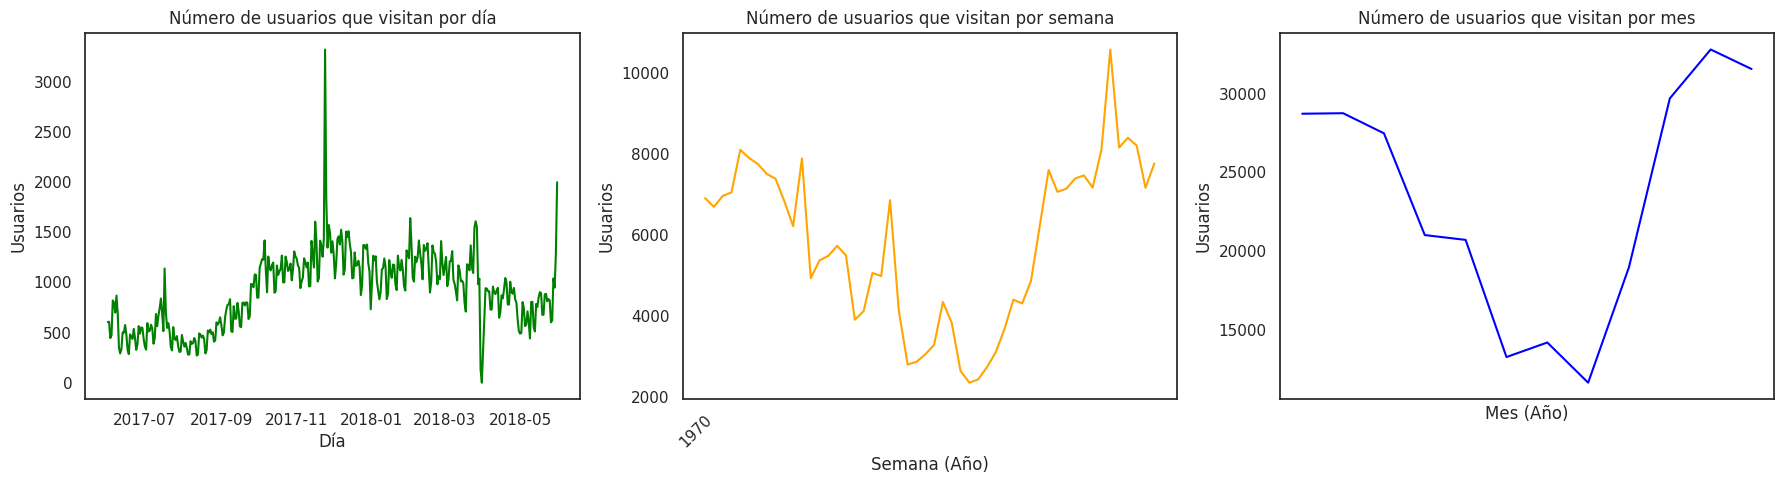

In [291]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

# Gráfico diario
ax[0].plot(visitas_por_dia, color ='green')
ax[0].set(title='Número de usuarios que visitan por día', xlabel='Día', ylabel='Usuarios')

# Gráfico semanal

ax[1].plot(visitas_por_semana, color='orange')
ax[1].set(title='Número de usuarios que visitan por semana', xlabel='Semana (Año)', ylabel='Usuarios')
ax[1].tick_params(axis='x', rotation=45)  # Rotación para mejor visibilidad


# Gráfico mensual
ax[2].plot(visitas_por_mes, color='blue')
ax[2].set(title='Número de usuarios que visitan por mes', xlabel='Mes (Año)', ylabel='Usuarios')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
No logre hacer la grafica, ahora no me aparecen las etiquetas, Ayuda!!! es lo unico que me hace falta 
</div>


<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> El desglose de visitas por día, semana y mes está bien implementado, lo que facilita la comprensión del tráfico a través de diferentes intervalos de tiempo. Los gráficos también ofrecen una buena visualización de tendencias.</div>

<div class="alert alert-block alert-danger"> <b>A resolver</b> <a class="tocSkip"></a> 

Hay una inconsistencia en el gráfico semanal y mensual en comparación con el diario. Dado que la muestra abarca dos años, la primera semana del segundo año (año t+1) debería aparecer después de la última semana del primer año (año t). Esto no se refleja en el gráfico actual porque las semanas no están diferenciadas por año. Lo mismo sucede con el grafico mensual.
Sugiero que explores otros métodos para calcular los ultimos dos graficos, teniendo en cuenta también la separación por años.

</div>

<div class="alert alert-block alert-danger"> <b>A resolver</b> <a class="tocSkip"></a> 

El comentario de arriba no ha sido atendido. 
</div>

### Duración promedio de cada sesión 

In [225]:
#Cantidad de la duracion promedio de la pagina web

visitas['session_duration'] = (visitas['end_ts'] - visitas['start_ts']).dt.seconds

mean_session = visitas['session_duration'].mean()
mean_session_min = round(mean_session / 60)
print(f'La duración promedio de sesiones es de: {mean_session_min} minutos aproximadamente')

La duración promedio de sesiones es de: 11 minutos aproximadamente


<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> La creación de la columna `duracion_session` calcula correctamente la duración de cada sesión, lo cual es clave para entender el comportamiento del usuario. </div>

## Ventas

### Cuando empieza los usuarios a comprar

In [234]:
# conocer la primer visita del usuario

primer_visita = visitas.groupby(['uid', 'source_id'])['start_ts'].min().reset_index()

primer_visita.columns= ['uid', 'source_id', 'first_visit']
primer_visita

,uid,source_id,first_visit
0,11863502262781,3,2018-03-01 17:27:00
1,49537067089222,2,2018-02-06 15:55:00
2,297729379853735,3,2017-06-07 18:47:00
3,313578113262317,2,2017-09-18 22:49:00
4,325320750514679,5,2017-09-30 14:29:00
...,...,...,...
277865,18446403737806311543,5,2017-11-30 03:36:00
277866,18446424184725333426,4,2017-12-06 20:32:00
277867,18446556406699109058,3,2018-01-01 16:29:00
277868,18446621818809592527,4,2017-12-27 13:27:00


In [235]:
# conocer la fecha de la primera compra del usuario 

# primer pedido

primer_pedido = ordenes.groupby('uid')['buy_ts'].min().reset_index()

primer_pedido.columns= ['uid', 'first_order']
primer_pedido

,uid,first_order
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [236]:
# unir tablas para calcular el tiempo de conversion 
tabla_conversion = primer_visita.merge(primer_pedido, on='uid', how='left')

# calcular los dias que tardo un usuario en convertirse en cliente
tabla_conversion['days_to_convert'] = (tabla_conversion['first_order'] - tabla_conversion['first_visit']).dt.days

In [237]:
# filtrar a los usuarios que se convirtieron 

conversion = tabla_conversion[~tabla_conversion['days_to_convert'].isna()]

print(conversion['days_to_convert'].mean())

2.1880031432812364


Esto quiere decir que los usuarios que tuvieron una compra, en promedio tandan 2 días desde su primera visita al sitio

### Compras que se realizaron a traves de las diferentes fuentes o canales de Marketing

In [238]:
# calcular la conversion de canales de marketing 
conversion_mkt = conversion.groupby('source_id')['uid'].count() / primer_visita.groupby('source_id')['uid'].count()
conversion_mkt = conversion_mkt * 100
conversion_mkt

source_id
1     37.570398
2     27.833873
3     18.521590
4     17.064352
5     17.825675
6           NaN
7      2.941176
9     30.148964
10    21.978431
Name: uid, dtype: float64

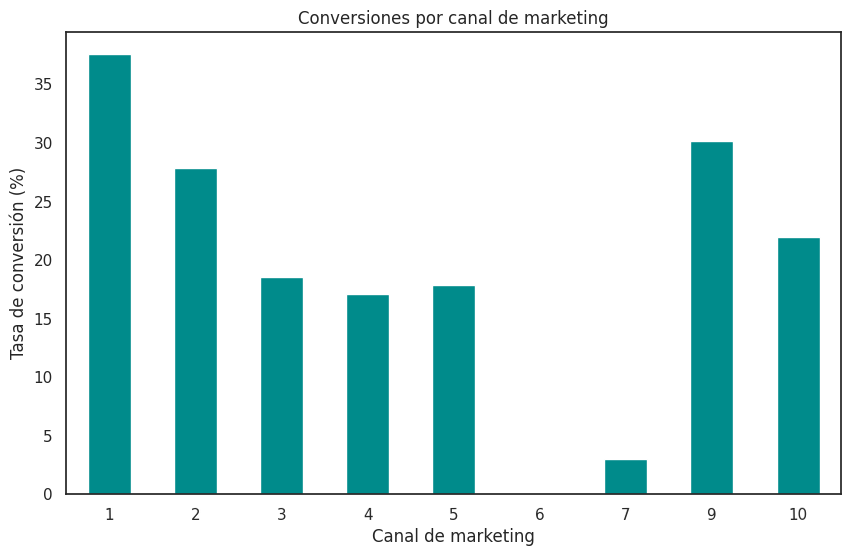

In [239]:
plt.figure()
conversion_mkt.plot(
    title='Conversiones por canal de marketing',
    xlabel='Canal de marketing', 
    ylabel='Tasa de conversión (%)',
    kind='bar', 
    color='darkcyan',
    rot=1, 
    figsize=(10,6))

plt.show()

La fuente o canal mas efectivo para convertir usuarios en clientes es el canal 1 con un 38% de efectividad, continuando con el canal 9 con un 30% de tasa de conversion. Los canales 6 y 7  no generan conversion de usuarios a clientes por lo cual es necesario eliminarlos y usar el dinero gastado en otro tipo de canales que si le generaran ingresos a la compañia

### Cuantos pedidos se realizan durante un periodo de tiempo

In [240]:
# periodo de tiempo
start_date = '2017-06-01'
end_date = '2018-06-01'

# filtrar rango de fechas 
filtro_orders = ordenes[(ordenes['buy_ts'] >= start_date) & (ordenes['buy_ts'] <= end_date)]

# agrupar pedidos por mes 
order_month = filtro_orders.groupby(filtro_orders['buy_ts'].dt.to_period('M'))['uid'].count()

print(order_month)

buy_ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
Freq: M, Name: uid, dtype: int64


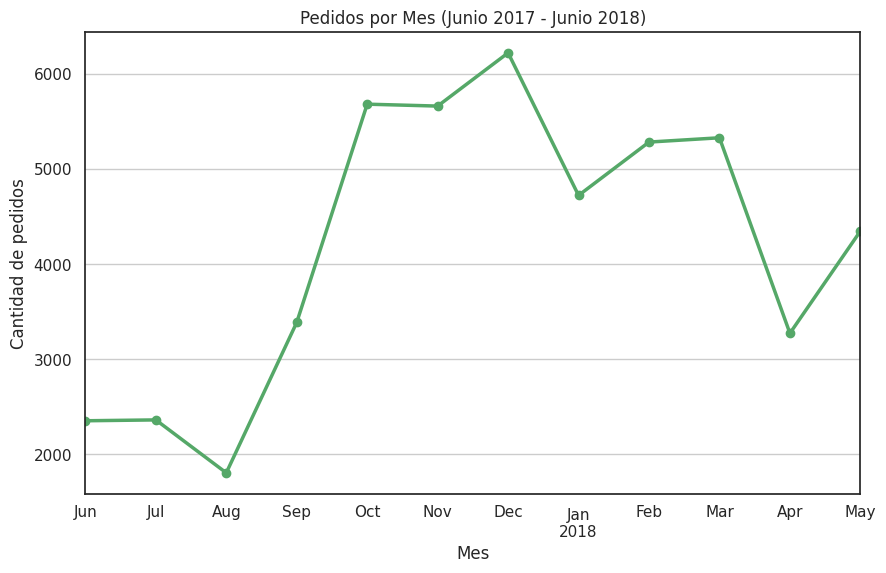

In [241]:
# graficar un lineplot para mostrar los pedidos realizados
order_month.plot(
    title= 'Pedidos por Mes (Junio 2017 - Junio 2018)',
    xlabel='Mes',
    ylabel='Cantidad de pedidos', 
    kind='line',
    marker='o',
    figsize=[10,6], 
    color='g', 
    linewidth=2.5)

plt.grid(axis='y')
plt.show()

En esta grafica se puede observar que definitivamente los meses con mayores ventas de la empresa son septiembre, octubre, noviembre y diciembre, lo cual es importante para el negocio ya que son los meses en donde todo tiene que ser eficiente y en donde la empresa puede recuperarse los meses muertos, como: abril y mayo

### Tamaño promedio de compra por usuario

In [242]:
compras_usuario = ordenes.groupby('uid')['revenue'].sum().reset_index(name='total_compras')

# Calcular el promedio de compra por usuario
promedio_compras_usuario = round(compras_usuario['total_compras'].mean())

print('Las compras promedio por usuario son:', promedio_compras_usuario)

Las compras promedio por usuario son: 7


In [243]:
# compra promedio por dia 

buys_day = ordenes.groupby(ordenes['buy_ts'].dt.to_period('D'))['revenue'].sum()

mean_day = buys_day.mean().round(2)

print(f'El tamaño promedio de compra por día es de: ${mean_day}')

El tamaño promedio de compra por día es de: $692.46


In [244]:
# compra promedio por semana 

buys_week = ordenes.groupby(ordenes['buy_ts'].dt.to_period('W'))['revenue'].sum()

mean_week = buys_week.mean().round(2)

print(f'El tamaño promedio de compra por semana es de: ${mean_week}')

El tamaño promedio de compra por semana es de: $4755.8


In [245]:
# compra promedio por mes 

buys_month = ordenes.groupby(ordenes['buy_ts'].dt.to_period('M'))['revenue'].sum()

mean_month = buys_month.mean().round(2)

print(f'El tamaño promedio de compra por mes es: ${mean_month}')

El tamaño promedio de compra por mes es: $19389.02


### Calcular el LTV (Valor del Ciclo de vida del cliente)

In [267]:
# Determinar el tamaño de cada cohorte de compradores
# Agrupa a los compradores por el mes de su primera compra y cuenta los usuarios únicos en cada grupo.
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()

In [268]:
# Renombra la columna 'uid' a 'n_buyers' para indicar el número de compradores únicos.
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

In [269]:
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [271]:
print("Columnas en 'ordenes':", ordenes.columns)
print("Columnas en 'buyers':", buyers.columns)

Columnas en 'ordenes': Index(['buy_ts', 'revenue', 'uid', 'order_month', 'buy_dt'], dtype='object')
Columnas en 'buyers': Index(['uid', 'first_session_start_ts', 'first_session_dt',
       'first_session_month', 'first_order_ts', 'first_order_dt',
       'first_order_month', 'days_to_first_purchase', 'source_id',
       'order_month', 'revenue'],
      dtype='object')


In [274]:
# Calcular la antigüedad de las cohortes
# Calcula la 'edad' de cada cohorte desde su primera compra, en meses.
cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()

In [275]:
# Actualiza los nombres de las columnas para reflejar los datos que contienen.
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

In [276]:
cohorts

,first_order_month,order_month,revenue,age_month
0,2017-06-01,2017-06-01,9557.49,0.0
1,2017-06-01,2017-07-01,981.82,1.0
2,2017-06-01,2017-08-01,885.34,2.0
3,2017-06-01,2017-09-01,1931.30,3.0
4,2017-06-01,2017-10-01,2068.58,4.0
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2.0
75,2018-04-01,2018-04-01,10600.69,0.0
76,2018-04-01,2018-05-01,1209.92,1.0
77,2018-05-01,2018-05-01,13925.76,0.0


In [256]:
# Crear el informe de cohortes y calcular el LTV
# Une 'cohort_sizes' con 'cohorts' usando 'first_order_month' como clave.
# Calcula el LTV dividiendo los ingresos por el número de compradores.
cohorts_report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

In [277]:
# Preparar la tabla pivote para la visualización
# Crea una tabla pivote para visualizar el LTV de cada cohorte por su 'edad' en meses.
cohorts_ltv = cohorts_report.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

In [258]:
cohorts_ltv

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
# Redondea los valores a dos decimales y reemplaza los NaN por 0.
cohorts_ltv = cohorts_ltv.round(2)
cohorts_ltv 

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
# Convierte los índices de 'first_order_month' a cadena para mejorar la visualización en el heatmap.
cohorts_ltv.index = cohorts_ltv.index.astype(str)

Text(91.25, 0.5, 'Cohort (First Order Month)')

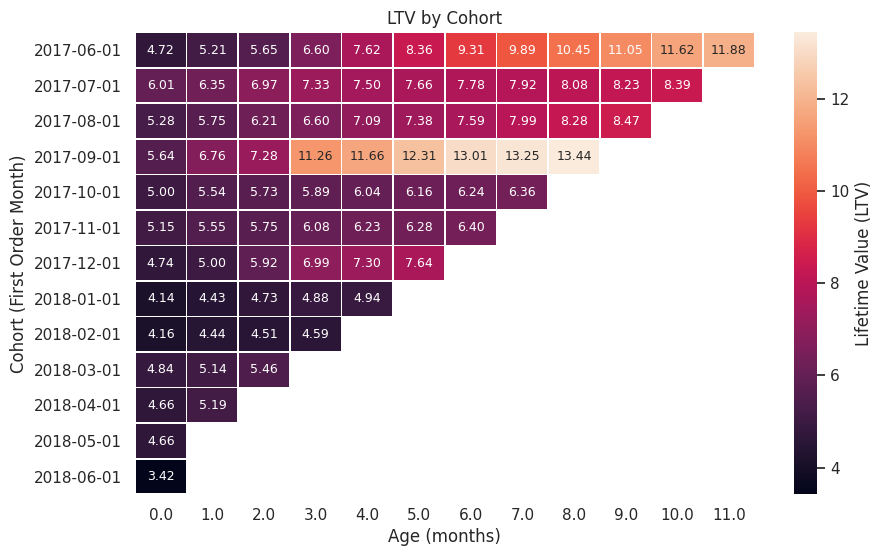

In [281]:
# Visualización del Heatmap del LTV
# Visualiza el LTV de las cohortes usando un mapa de calor.

plt.figure(figsize=(10, 6))  # Aumenta el tamaño de la figura si es necesario
ax = sns.heatmap(cohorts_ltv, annot=True, fmt=".2f", linewidths=0.5,
                 cbar_kws={'label': 'Lifetime Value (LTV)'}, annot_kws={"size": 9})
plt.title('LTV by Cohort')
plt.xlabel('Age (months)')
plt.ylabel('Cohort (First Order Month)')

Con este mapa de calor se está evaluando el valor de vida de los clientes mes a mes a partir de su primera compra. La "edad" es el número de meses que han pasado desde la primera compra de cada cohorte. Un valor más alto indica un LTV mayor, lo que sugiere que esos clientes generaron más ingresos acumulados desde su primera compra. Por otro lado, las celdas de color verde representan los valores más altos de LTV, mientras que los valores más bajos son de color azul oscuro. Esto facilita la visualización de cuáles cohortes y edades han sido más valiosas en términos de ingresos. Es importante resaltar que para septiembre del 2017, la empresa realizó algun evento o lanzo al mercado una estrategia de marketing,la cual fue efectiva ya que motivo a los clientes a realizar compras adicionales, aumentando asi el ingreso de la empresa

<div class="alert alert-block alert-danger">
  <b>A resolver:</b> <a class="tocSkip"></a> El calculo del LTV no corresponde a lo desarrollado en la teoría de este sprint. Se espera que muestres el LTV con un mapa de calor, tal como se presentó en la teoría del curso.
    
Primero asegurate de haber completado los siguientes pasos:
    
    # Cargar datos de visitas desde un archivo CSV
    visits = pd.read_csv('/datasets/visits_log_us.csv')

    # Convertir las columnas de tiempos de inicio y fin de las visitas al formato de fecha y hora
    visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y.%m.%d %H:%M:%S")
    visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y.%m.%d %H:%M:%S")

    # Renombrar las columnas para mayor claridad
    visits = visits.rename(columns={"Device": "device", "End Ts": "session_end_ts", 
                                    "Source Id": "source_id", "Start Ts": "session_start_ts", "Uid": "uid"})

    # Extraer el mes, la semana y la fecha de inicio de sesión
    visits['session_month'] = visits['session_start_ts'].astype('datetime64[M]')
    visits['session_week'] = visits['session_start_ts'].astype('datetime64[W]')
    visits['session_date'] = visits['session_start_ts'].dt.date

    # Encontrar la primera visita de cada usuario
    first_visits = visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()
    first_visits.columns = ['uid', 'first_session_start_ts']

    # Extraer la fecha y el mes de la primera sesión
    first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
    first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')

    # Combinar los datos de las primeras visitas con los datos completos de visitas
    visits_full = pd.merge(first_visits, visits, on='uid')

    # Calcular la diferencia en meses entre la primera visita y las visitas subsiguientes
    visits_full['age_months'] = ((visits_full['session_month'] - visits_full['first_session_month']) / 
                                 np.timedelta64(1, 'M')).round().astype('int')

    # Cargar datos de pedidos desde un archivo CSV
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
    orders = orders.rename(columns={"Buy Ts": "buy_ts", "Revenue": "revenue", "Uid": "uid"})

    # Extraer el día y el mes de compra
    orders['buy_dt'] = orders['buy_ts'].dt.date
    orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

    # Encontrar la primera compra de cada usuario
    first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
    first_orders.columns = ['uid', 'first_order_ts']
    first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
    first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

    # Crear un dataframe con las primeras órdenes y las primeras visitas
    buyers = pd.merge(first_visits, first_orders, on='uid')
    buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
    buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

    # Calcular los días hasta la primera compra
    buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) / 
                                        np.timedelta64(1, 'D')).astype('int')

 Ahora si, el calculo del LTV:
    
    # LTV
    # Determinar el tamaño de cada cohorte de compradores
    # Agrupa a los compradores por el mes de su primera compra y cuenta los usuarios únicos en cada grupo.
    cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    # Renombra la columna 'uid' a 'n_buyers' para indicar el número de compradores únicos.
    cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

    # Fusionar las órdenes y compradores, y calcular ingresos por cohorte
    # Une los DataFrames 'orders' y 'buyers' usando 'uid' como clave, y agrupa el resultado por mes de la primera orden y mes de orden.
    # Calcula la suma de los ingresos para cada grupo.
    cohorts = pd.merge(orders, buyers, how='inner', on='uid')\
                .groupby(['first_order_month', 'order_month'])\
                .agg({'revenue': 'sum'}).reset_index()

    # Calcular la antigüedad de las cohortes
    # Calcula la 'edad' de cada cohorte desde su primera compra, en meses.
    cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()
    # Actualiza los nombres de las columnas para reflejar los datos que contienen.
    cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

    # Crear el informe de cohortes y calcular el LTV
    # Une 'cohort_sizes' con 'cohorts' usando 'first_order_month' como clave.
    # Calcula el LTV dividiendo los ingresos por el número de compradores.
    cohorts_report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
    cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

    # Preparar la tabla pivote para la visualización
    # Crea una tabla pivote para visualizar el LTV de cada cohorte por su 'edad' en meses.
    cohorts_ltv = cohorts_report.pivot_table(
        index='first_order_month', 
        columns='age_month', 
        values='ltv', 
        aggfunc='sum'
    ).cumsum(axis=1)
    # Redondea los valores a dos decimales y reemplaza los NaN por 0.
    cohorts_ltv = cohorts_ltv.round(2)
    # Convierte los índices de 'first_order_month' a cadena para mejorar la visualización en el heatmap.
    cohorts_ltv.index = cohorts_ltv.index.astype(str)

    # Visualización del Heatmap del LTV
    # Visualiza el LTV de las cohortes usando un mapa de calor.
    plt.figure(figsize=(10, 6))  # Aumenta el tamaño de la figura si es necesario
    ax = sns.heatmap(cohorts_ltv, annot=True, fmt=".2f", linewidths=0.5,
                     cbar_kws={'label': 'Lifetime Value (LTV)'}, annot_kws={"size": 9})
    plt.title('LTV by Cohort')
    plt.xlabel('Age (months)')
    plt.ylabel('Cohort (First Order Month)')
    
</div>

## Marketing

### Cuanto diero se gato la empresa en Marketing

In [185]:
# Gastos totales 

gasto_total = costos['costs'].sum()
print(f'El gasto total es: ${gasto_total}')

El gasto total es: $329131.62


### Dinero gastado o invertido en cada fuente (canal) de adquisicion de usuarios

In [186]:
#Gastos totales por la fuente de adquisición

gasto_por_fuente = costos.groupby('source_id')['costs'].sum().reset_index()
print(gasto_por_fuente)

   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


#Esto significa que del total de gastos 329.132 que realiza la compañia el 43% va destinado a la fuente: numero 3

<Figure size 640x480 with 0 Axes>

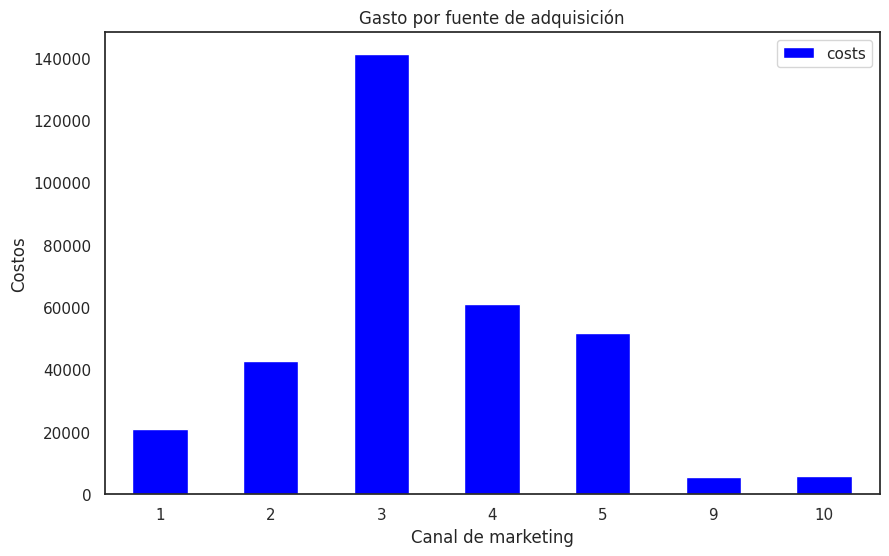

In [187]:
# grafico de barras para el gasto por fuente de adquisicion
plt.figure()

gasto_por_fuente.plot(
    title='Gasto por fuente de adquisición',
    x='source_id',
    xlabel='Canal de marketing', 
    ylabel='Costos',
    kind='bar', 
    rot=1, 
    color='blue',
    figsize=(10,6))

plt.show()

La empresa cuenta con diferentes costos de de los canales de marketing, el canal con mayor costo es el 3, lo cual indica que es un canal que se le esta invirtiendo mucho dinero pero no genera conversiones para la compañia. Por otra parte el canal 1, 9 y 2 tienen un menor gasto y son los 3 principales canales en la tasa de conversión por lo cual seria una mejor opcion destinar un mayor gasto a estos canales.

In [190]:
costos['dt'] = pd.to_datetime(costos['dt'])
costos['costs_month'] = costos['dt'].astype('datetime64[M]')

In [193]:
# Calcular el CAC medio
print("CAC medio es:", round(costos['costs'].sum() / ordenes['uid'].nunique(), 2))

CAC medio es: 9.01


In [195]:
# Calcular el CAC por mes

CAC_by_month = pd.merge(costos.groupby('costs_month').agg({'costs': 'sum'}),
                        buyers.groupby('first_order_month').agg({'uid': 'nunique'}),
                        left_index=True, right_index=True)
CAC_by_month['cac'] = CAC_by_month['costs'] / CAC_by_month['uid']

<AxesSubplot:title={'center':'CAC promedio por mes'}, xlabel='Mes', ylabel='c.u.'>

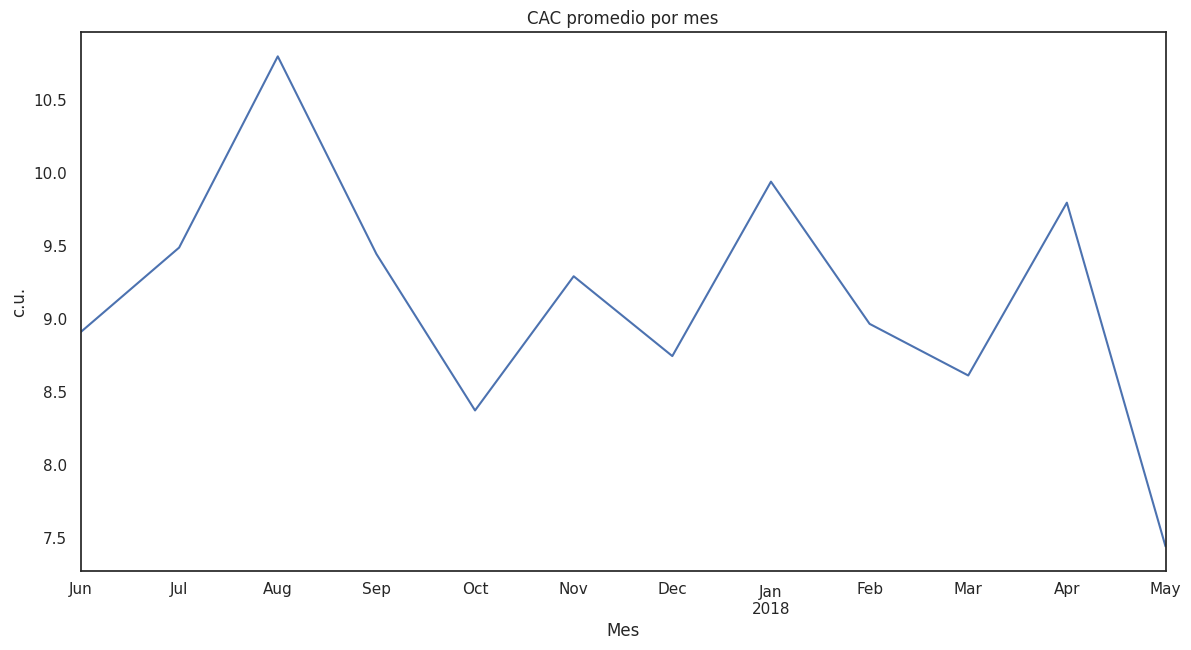

In [196]:
# Gráfico del CAC promedio por mes
CAC_by_month['cac'].plot(figsize=(14, 7), title='CAC promedio por mes', xlabel='Mes', ylabel='c.u.')

In [198]:
# Encontrar la primera fuente por visitante

users = visits_full.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

In [199]:
buyers

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0,5
...,...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01,95,5
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,0,3
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,231,2
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,103,3


In [204]:
# Calcular el CAC diario por fuente
costs_ = pd.merge(buyers_daily, costos, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['cac'] = costs_['costs'] / costs_['n_buyers']

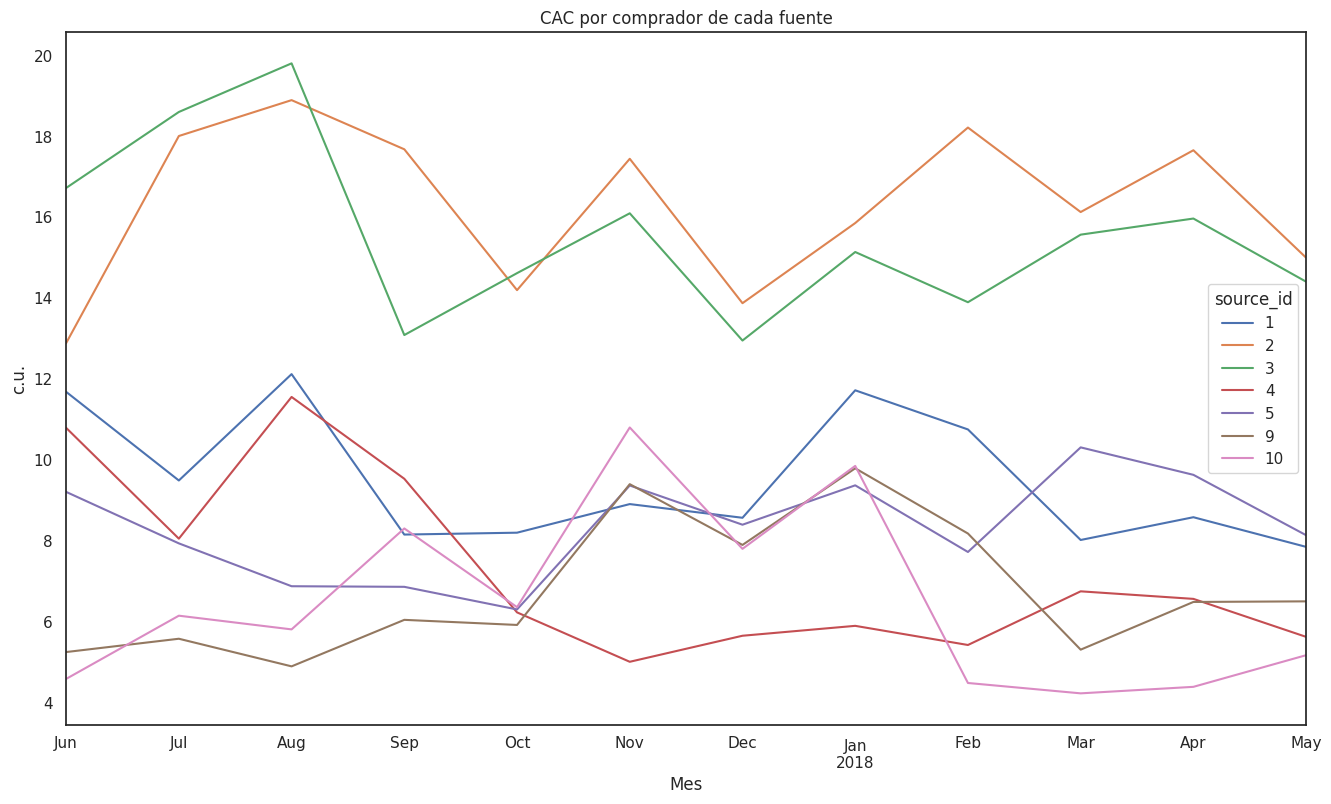

In [207]:
# Gráfico de CAC diario por fuente y mes
costs_.pivot_table(index=['costs_month'], columns='source_id', values='cac', aggfunc='mean').plot(
    figsize=(16, 9), title='CAC por comprador de cada fuente', xlabel='Mes', ylabel='c.u.')
plt.show()

In [208]:
# Calcular el CAC promedio por fuente

cac_by_source = costs_.groupby('source_id').agg({'cac': 'mean'}).round(2)
print(cac_by_source)

             cac
source_id       
1           9.49
2          16.29
3          15.58
4           7.27
5           8.34
9           6.84
10          6.56


<div class="alert alert-block alert-danger">
  <b>A resolver:</b> <a class="tocSkip"></a>
  
E CAC no está en el orden de lo esperado estimado Jairo. Puedes llegar a las cifras correctas si corres el código que te comparti. Primero corre el codigo del LTV y luego, el código del CAC. 
    
Si despues corres el código que compartí para el cálculo del ROMI, llegarás a todos los resultados esperados. Basta que corras mis comentarios en el orden que te compartí para obtener estas tres métricas medulares.     
    
</div>

<div class="alert alert-block alert-danger">
  <b>A resolver:</b> <a class="tocSkip"></a>
  
Falta el cálculo del ROMI, que debería mostrar que ni las fuentes 3 y 10 son rentables. Recomiendo revisar como se calculó el ROMI en la teoria del sprint. Esperamos un numero inferior a 1 para fuentes no rentables y superior a 1 para fuentes rentables. 

Aqui unas lineas de codigo para llegar a las metricas esperadas.
    
    # Calcular ingresos mensuales por usuario
    month_revenue = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
    buyers = buyers.merge(month_revenue, on='uid')

    # Iterar a través de cada fuente de tráfico, excepto la fuente número 7
    for source, df in buyers.groupby('source_id'):
        if source != 7:
            # Calcular el tamaño de la cohorte para cada fuente y mes de la primera orden
            cohort_sizes_t = (
                df.groupby(['source_id', 'first_order_month'])
                .agg({'uid': 'nunique'})
                .reset_index()
            )
            cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

            # Calcular los ingresos totales por cohorte
            cohorts_revenue_t = (
                df.groupby(['source_id', 'first_order_month', 'order_month'])
                .agg({'revenue': 'sum'})
                .reset_index()
            )
            cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

            # Fusionar los tamaños de las cohortes con los ingresos por cohortes
            report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
            report_romi['age'] = (
                report_romi['order_month'] - report_romi['first_order_month']
            ) / np.timedelta64(1, 'M')
            report_romi['age'] = report_romi['age'].round().astype('int')
            report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

            # Calcular costos y CAC para cada cohorte
            report_romi = pd.merge(report_romi, costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
                                   left_on=['source_id', 'first_order_month'], right_on=['source_id', 'costs_month'])
            report_romi = report_romi.drop(['costs_month'], axis=1)
            report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
            report_romi['romi'] = report_romi['ltv'] / report_romi['cac']

            # Crear una tabla pivote de ROMI por edad para cada cohorte
            romi = report_romi\
                    .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                    .cumsum(axis=1)
            romi.round(2).fillna('')

            # Configurar el índice como cadena para un mejor formato
            romi.index = romi.index.astype(str)

            # Visualizar el ROMI utilizando un mapa de calor
            sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}
                        ).set(title='ROMI por fuente {}'.format(source))
            plt.show()

    
    
</div>

### ROMI (Retorno de la Inversión en Marketing)

In [212]:
# Calcular ingresos mensuales por usuario
month_revenue = ordenes.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyers = buyers.merge(month_revenue, on='uid')

In [213]:
# Iterar a través de cada fuente de tráfico, excepto la fuente número 7
for source, df in buyers.groupby('source_id'):

    if source != 7:
        # Calcular el tamaño de la cohorte para cada fuente y mes de la primera orden
        cohort_sizes_t = (
            df.groupby(['source_id', 'first_order_month'])
            .agg({'uid': 'nunique'})
            .reset_index()
        )
        cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

In [215]:
# Calcular los ingresos totales por cohorte
cohorts_revenue_t = (
            df.groupby(['source_id', 'first_order_month', 'order_month'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )
cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

In [217]:
# Fusionar los tamaños de las cohortes con los ingresos por cohortes
report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
report_romi['age'] = (
            report_romi['order_month'] - report_romi['first_order_month']
        ) / np.timedelta64(1, 'M')
report_romi['age'] = report_romi['age'].round().astype('int')
report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

In [220]:
# Calcular costos y CAC para cada cohorte
report_romi = pd.merge(report_romi, costos.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
                               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'costs_month'])
report_romi = report_romi.drop(['costs_month'], axis=1)
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']

In [221]:
# Crear una tabla pivote de ROMI por edad para cada cohorte
romi = report_romi\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                .cumsum(axis=1)
romi.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9
first_order_month,,,,,,,,,,
2017-06-01,0.73,0.77,,,,,,,0.77,
2017-07-01,0.54,0.54,,0.56,,,,,0.56,
2017-08-01,0.80,0.81,0.87,,,,,0.89,,0.9
2017-09-01,0.42,0.43,0.44,0.48,0.49,,,0.49,0.49,
2017-10-01,0.87,0.9,0.9,0.91,0.92,0.93,0.93,0.95,,
2017-11-01,0.75,0.76,0.76,0.79,0.8,0.81,0.82,,,
2017-12-01,0.50,0.52,,,,0.52,,,,
2018-01-01,0.46,0.47,0.48,,,,,,,
2018-02-01,0.63,0.66,0.66,,,,,,,


In [222]:
# Configurar el índice como cadena para un mejor formato
romi.index = romi.index.astype(str)

In [223]:
romi

age,0,1,2,3,4,5,6,7,8,9
first_order_month,,,,,,,,,,
2017-06-01,0.729903,0.765101,NaN,NaN,NaN,NaN,NaN,NaN,0.767806,NaN
2017-07-01,0.535231,0.540052,NaN,0.563186,NaN,NaN,NaN,NaN,0.564308,NaN
2017-08-01,0.795029,0.812874,0.865417,NaN,NaN,NaN,NaN,0.885110,NaN,0.899557
2017-09-01,0.417066,0.429136,0.444505,0.480170,0.485467,NaN,NaN,0.487312,0.491957,NaN
2017-10-01,0.872569,0.900341,0.903753,0.909397,0.922151,0.925403,0.932036,0.949365,NaN,NaN
2017-11-01,0.746618,0.755086,0.757396,0.787407,0.804319,0.812345,0.821205,NaN,NaN,NaN
2017-12-01,0.498916,0.516892,NaN,NaN,NaN,0.524464,NaN,NaN,NaN,NaN
2018-01-01,0.464084,0.466363,0.476813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.632736,0.662390,0.663409,NaN,NaN,NaN,NaN,NaN,NaN,NaN


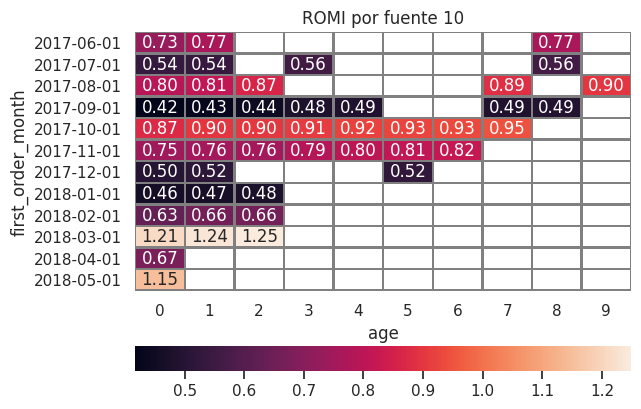

In [224]:
# Visualizar el ROMI utilizando un mapa de calor
sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}
                    ).set(title='ROMI por fuente {}'.format(source))
plt.show()

## Conclusiones

La informacion analizada comprende desde el junio del 2017 hasta mayo del 2018. Se realizaron en ese periodo de tiempo 359.400 visitas de la pagina las cuales 73% fueron visitas realizads en el desktop y el 27% se realizaron a través de touch. El promedio de visitantes por dia es 907 y por mes 23.228 usuarios. Se presenta un incremento en las sesiones de los usuarios en noviembre y diciembre de 2017, lo que significa que las ventas se incrementaron debido a Black Friday y Navidad. Las ventas se incrementan en los dos ultimos meses del mes (noviembre y Diciembre), esto es debido a la naturaleza del negocio. Los usuarios realizan en promedio 5 compras.

Se recomienda al equipo de Marketing tener presente:
	• La tasa de retención de clientes es alta en los primersos meses, sin embargo despues tienen a tener usuarios inactivos, entonces es necesario generar estrategias que permitan que los clientes se mantengan visitando la pagina y por supuesto comprando. Puede ser a través de un Plam de acumulación de puntos.
	• Hay clientes que visitan la pagina pero no realizan una compra rapidamente sino hasta despues de varios dias o inclusive meses, entonces es importante generar una estrategia en donde le llegue al correo a los clientes un email, recordandoles sobre la compra, con el fin de cerrar esa brecha.
	• Los gatos de la compañía son altos, en especial para la fuente de adquicision numero (3). Se recomienda disminuir ese gasto e incrementar el gasto de adquisición del numero (1), ya que es la fuente que genera mayor Ingreso para la compañía. 
La compañía es solida ya que el LTV (7) es mayor al CAC (1), Lo que indica que es proporcional lo que se gasta para adquirir un cliente, con respecto a lo que el cliente aporta en sus compras. 